<a href="https://colab.research.google.com/github/Swapnil-417/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime as dt

import warnings
warnings.filterwarnings("ignore")

In [3]:
# importing the dataset
directory_path = "/content/drive/MyDrive/Capstone Projects/Bike Sharing Demand Prediction – Swapnil Patil/Data/"
bike_df = pd.read_csv(directory_path + "SeoulBikeData.csv", encoding= 'unicode_escape')

# **Getting to Know about Data**

At the very first, we want to start understanding the data.

In [4]:
# first look
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
bike_df.shape

(8760, 14)

In [7]:
bike_df.columns= map(str.lower, bike_df.columns)
bike_df.columns

Index(['date', 'rented bike count', 'hour', 'temperature(°c)', 'humidity(%)',
       'wind speed (m/s)', 'visibility (10m)', 'dew point temperature(°c)',
       'solar radiation (mj/m2)', 'rainfall(mm)', 'snowfall (cm)', 'seasons',
       'holiday', 'functioning day'],
      dtype='object')

In [8]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       8760 non-null   object 
 1   rented bike count          8760 non-null   int64  
 2   hour                       8760 non-null   int64  
 3   temperature(°c)            8760 non-null   float64
 4   humidity(%)                8760 non-null   int64  
 5   wind speed (m/s)           8760 non-null   float64
 6   visibility (10m)           8760 non-null   int64  
 7   dew point temperature(°c)  8760 non-null   float64
 8   solar radiation (mj/m2)    8760 non-null   float64
 9   rainfall(mm)               8760 non-null   float64
 10  snowfall (cm)              8760 non-null   float64
 11  seasons                    8760 non-null   object 
 12  holiday                    8760 non-null   object 
 13  functioning day            8760 non-null   objec

In this Dataset, we have 8760 rows and 14 columns from which "rented bike count" is our target variable. There are numerical variables as well as categorical variables and one date variable which is stored as object so we can change its dtype.

In [9]:
# changing dtype of date column
def get_date(date_str):
  date_obj= dt.datetime.strptime(date_str, '%d/%m/%Y')
  date_obj= pd.to_datetime(date_obj.date(), format="%Y-%m-%d")
  return date_obj

bike_df['date'] = bike_df['date'].apply(get_date)

In [10]:
bike_df['day']= bike_df['date'].dt.day
bike_df['month']= bike_df['date'].dt.month
bike_df['year']= bike_df['date'].dt.year

bike_df= bike_df.drop("date", axis= 1)

In [11]:
bike_df.dtypes

rented bike count              int64
hour                           int64
temperature(°c)              float64
humidity(%)                    int64
wind speed (m/s)             float64
visibility (10m)               int64
dew point temperature(°c)    float64
solar radiation (mj/m2)      float64
rainfall(mm)                 float64
snowfall (cm)                float64
seasons                       object
holiday                       object
functioning day               object
day                            int64
month                          int64
year                           int64
dtype: object

In [12]:
bike_df.head()

,rented bike count,hour,temperature(°c),humidity(%),wind speed (m/s),visibility (10m),dew point temperature(°c),solar radiation (mj/m2),rainfall(mm),snowfall (cm),seasons,holiday,functioning day,day,month,year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017


In [13]:
# checking for duplicate values
bike_df.duplicated().sum()

0

In [14]:
# checking for missing values
bike_df.isnull().sum()

rented bike count            0
hour                         0
temperature(°c)              0
humidity(%)                  0
wind speed (m/s)             0
visibility (10m)             0
dew point temperature(°c)    0
solar radiation (mj/m2)      0
rainfall(mm)                 0
snowfall (cm)                0
seasons                      0
holiday                      0
functioning day              0
day                          0
month                        0
year                         0
dtype: int64

Above we can see there are no missing values as well as no duplicate values in the dataset.

In [15]:
bike_df.describe(include='all')

,rented bike count,hour,temperature(°c),humidity(%),wind speed (m/s),visibility (10m),dew point temperature(°c),solar radiation (mj/m2),rainfall(mm),snowfall (cm),seasons,holiday,functioning day,day,month,year
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760,8760.000000,8760.000000,8760.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,No Holiday,Yes,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465,NaN,NaN,NaN
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN,15.720548,6.526027,2017.915068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN,8.796749,3.448048,0.278796
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,1.000000,2017.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN,8.000000,4.000000,2018.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN,16.000000,7.000000,2018.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN,23.000000,10.000000,2018.000000


# **Exploratory Data Analysis**

## **Univariate Analysis**

### **Dependent Variable**

First we will start with analyzing our target variable which is **rented bike count**.

In [16]:
dependent_var= "rented bike count"

In [17]:
bike_df[dependent_var].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: rented bike count, dtype: float64

In [18]:
bike_df[dependent_var].value_counts()

0       295
122      19
223      19
262      19
103      18
       ... 
2379      1
1589      1
1597      1
1605      1
2047      1
Name: rented bike count, Length: 2166, dtype: int64

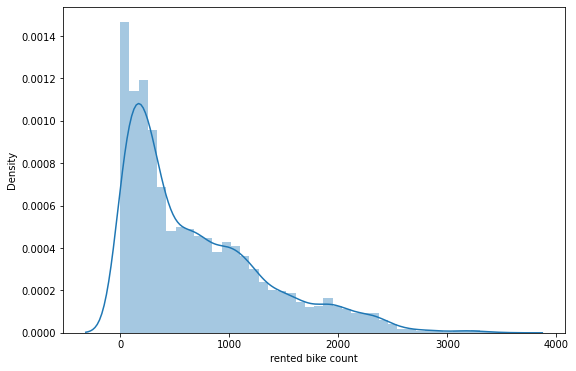

In [19]:
plt.figure(figsize=(9,6))
sns.distplot(bike_df[dependent_var]);

Dependent variable i.e rented bike count is slightly skewed towards right side (positively skewed). So we will apply transformation and again look at the distribution.

Below are some transformation technique to reduce skewness.

<b>square-root for moderate skew:</b>
sqrt(x) for positively skewed data,
sqrt(max(x+1) - x) for negatively skewed data

<b>log for greater skew:</b>
log10(x) for positively skewed data,
log10(max(x+1) - x) for negatively skewed data

<b>inverse for severe skew:</b>
1/x for positively skewed data
1/(max(x+1) - x) for negatively skewed data


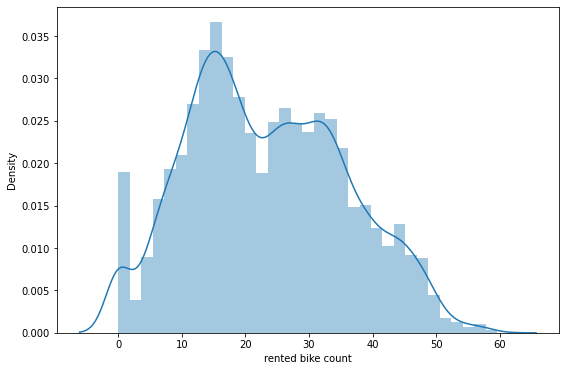

In [20]:
# applying square-root trasnformation
plt.figure(figsize=(9,6))
sns.distplot(np.sqrt(bike_df[dependent_var]));

It looks good and almost near to normal distribution.



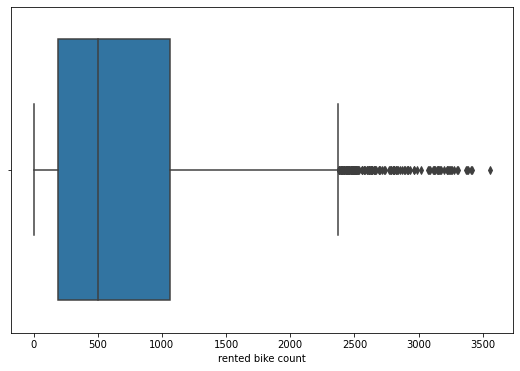

In [21]:
plt.figure(figsize=(9,6))
sns.boxplot(bike_df[dependent_var]);

From boxplot, we can see the median value of rented bike count is near 500 and there are some outliers towards upper limit.

### **Independent Variables**

Starting with the numerical variables.

In [22]:
# numerical variables
num_variables= list(bike_df.describe().columns[1:])

In [23]:
num_variables

['hour',
 'temperature(°c)',
 'humidity(%)',
 'wind speed (m/s)',
 'visibility (10m)',
 'dew point temperature(°c)',
 'solar radiation (mj/m2)',
 'rainfall(mm)',
 'snowfall (cm)',
 'day',
 'month',
 'year']

In [24]:
bike_df[num_variables].describe()

,hour,temperature(°c),humidity(%),wind speed (m/s),visibility (10m),dew point temperature(°c),solar radiation (mj/m2),rainfall(mm),snowfall (cm),day,month,year
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,15.720548,6.526027,2017.915068
std,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,8.796749,3.448048,0.278796
min,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,1.000000,2017.000000
25%,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,8.000000,4.000000,2018.000000
50%,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,16.000000,7.000000,2018.000000
75%,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,23.000000,10.000000,2018.000000
max,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,31.000000,12.000000,2018.000000


In [25]:
# unique count of numerical variables
lst= []
for col in num_variables:
  lst.append(bike_df[col].nunique())

unique_cnt_df= pd.DataFrame(index= num_variables, columns=['unique_count'])
unique_cnt_df['unique_count']= lst
unique_cnt_df

,unique_count
hour,24
temperature(°c),546
humidity(%),90
wind speed (m/s),65
visibility (10m),1789
dew point temperature(°c),556
solar radiation (mj/m2),345
rainfall(mm),61
snowfall (cm),51
day,31


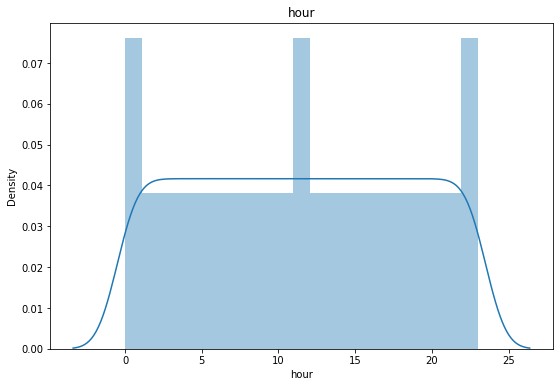

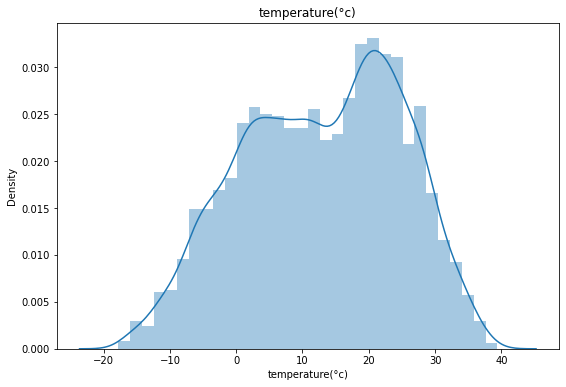

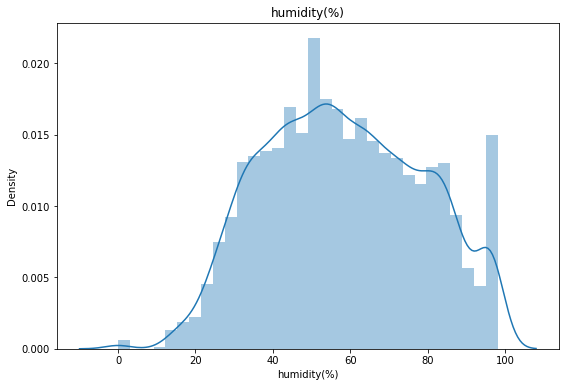

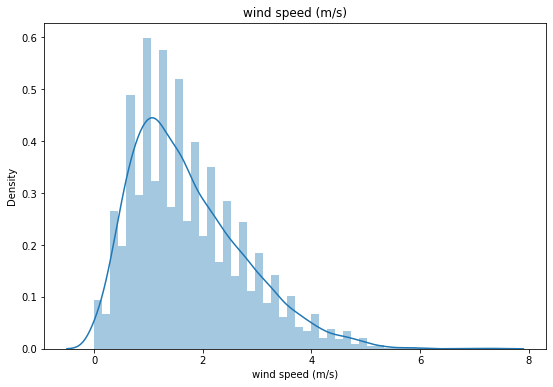

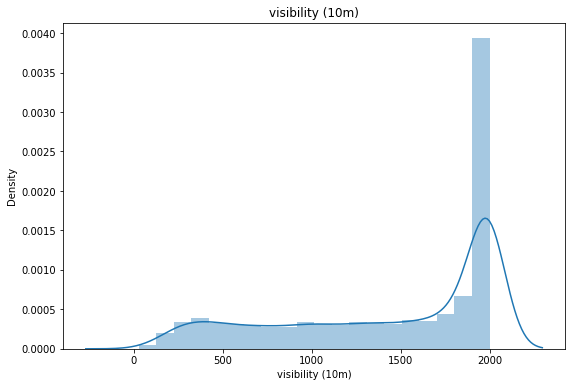

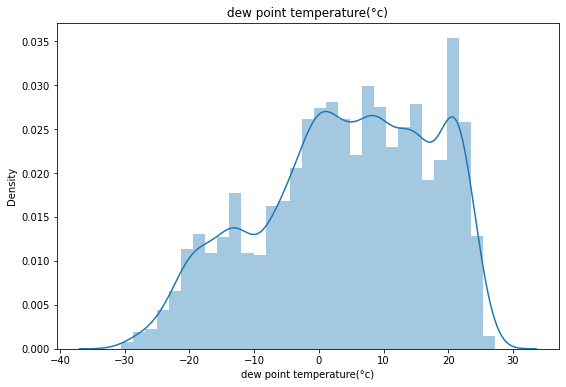

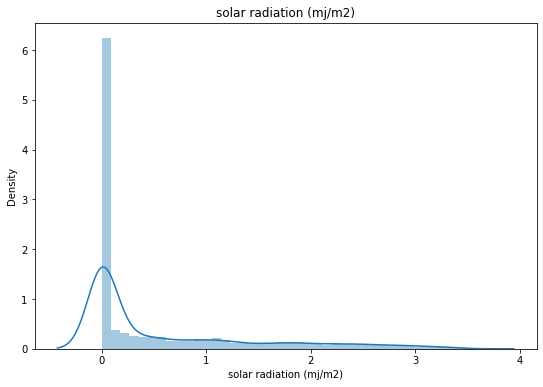

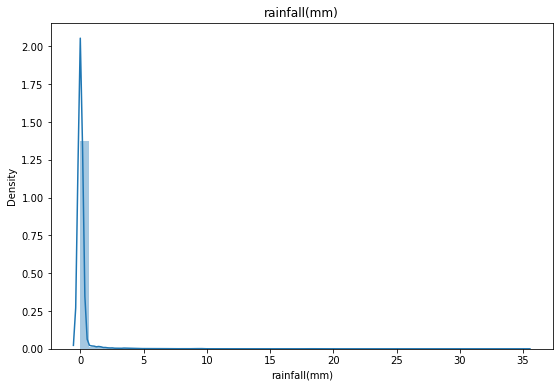

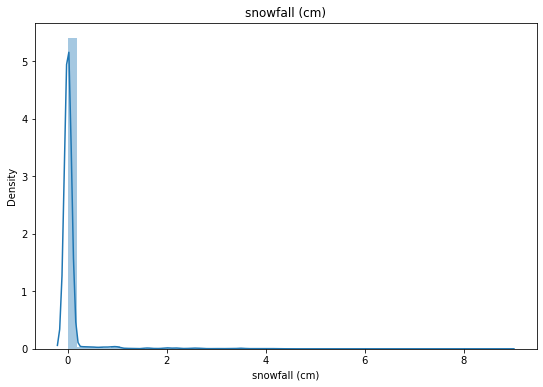

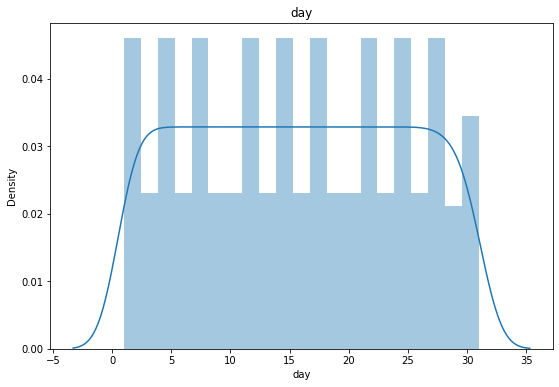

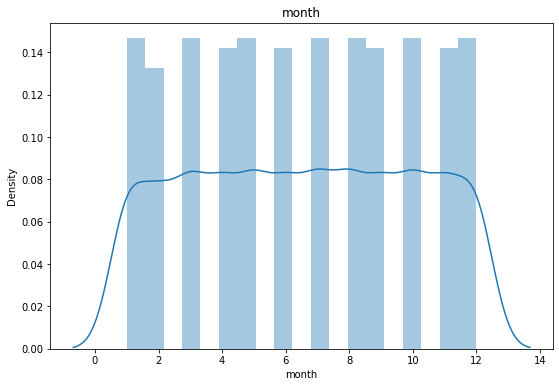

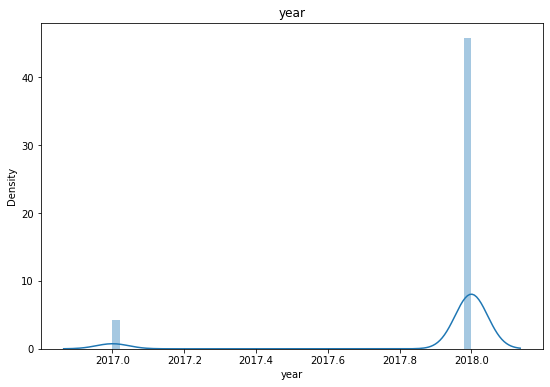

In [26]:
# distribution plot for each numerical feature

for col in num_variables:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  sns.distplot(bike_df[col], ax= ax)
  ax.set_title(col)
plt.show()

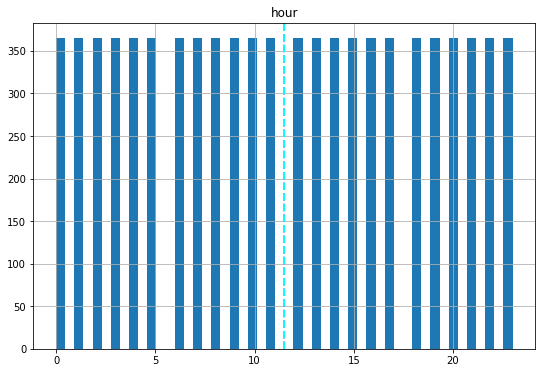

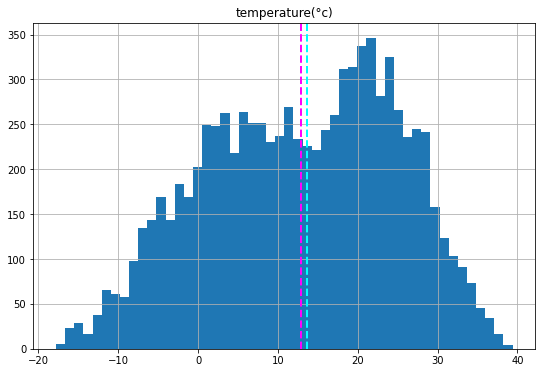

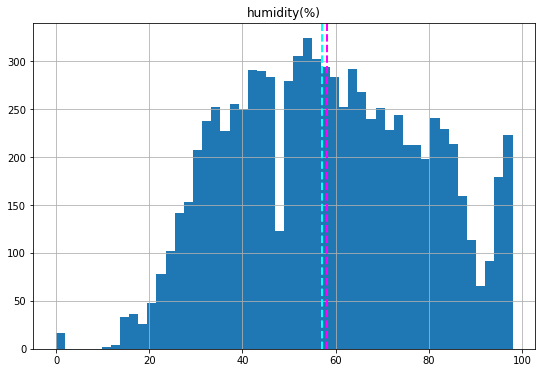

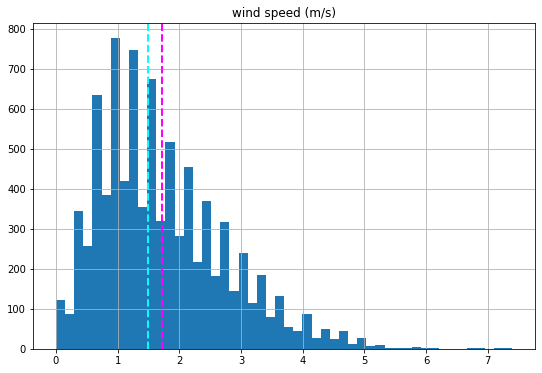

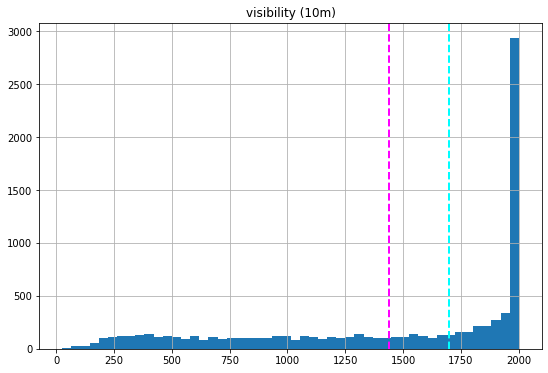

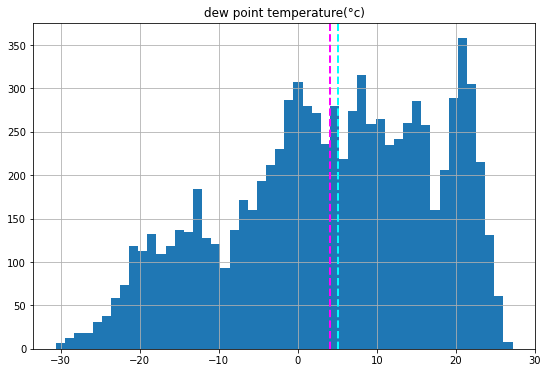

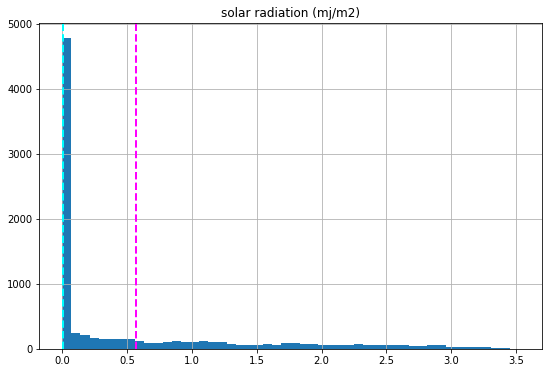

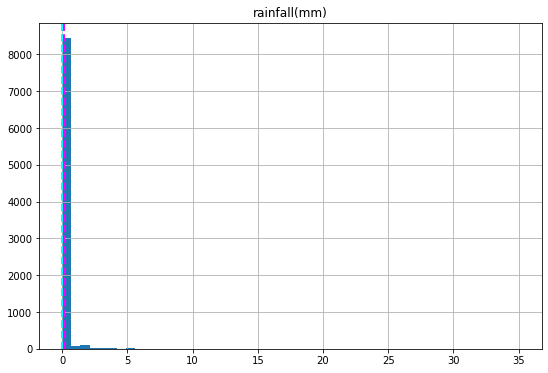

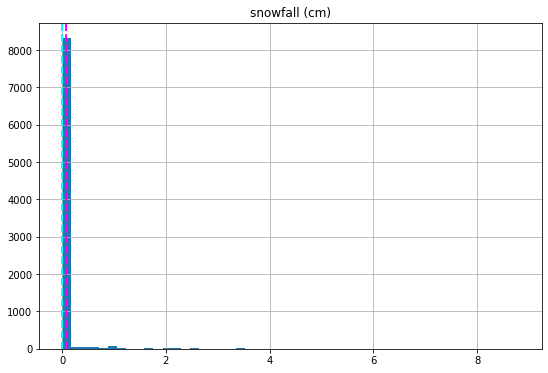

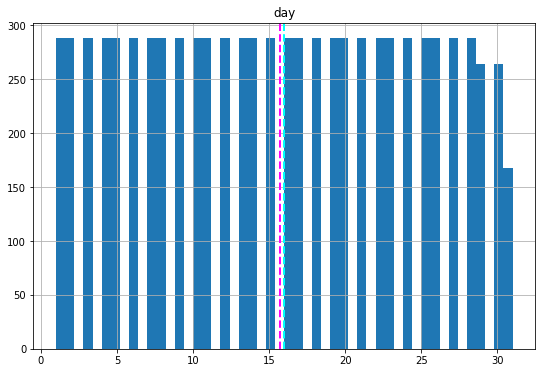

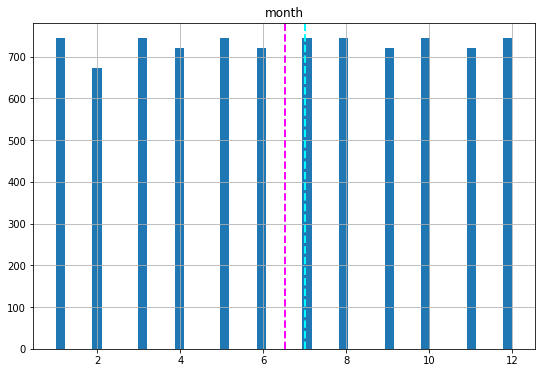

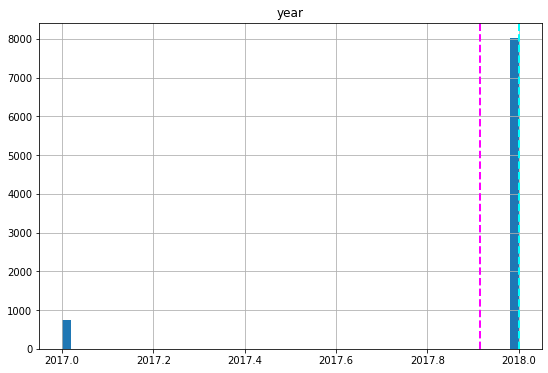

In [27]:
# histogram for each numerical feature count

for col in num_variables:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

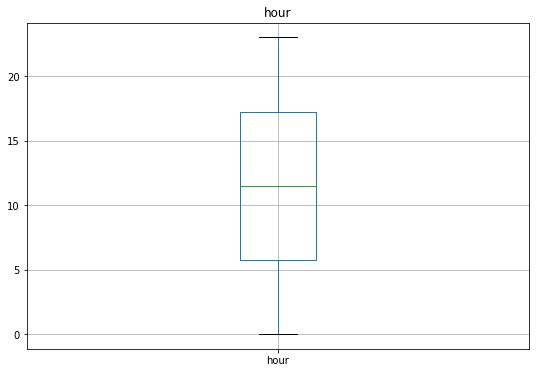

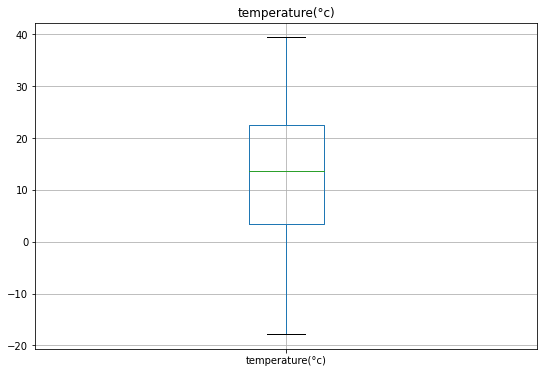

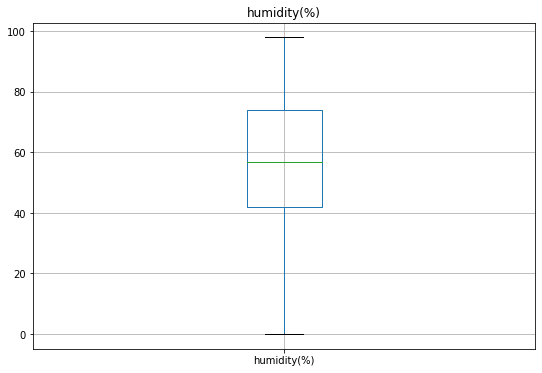

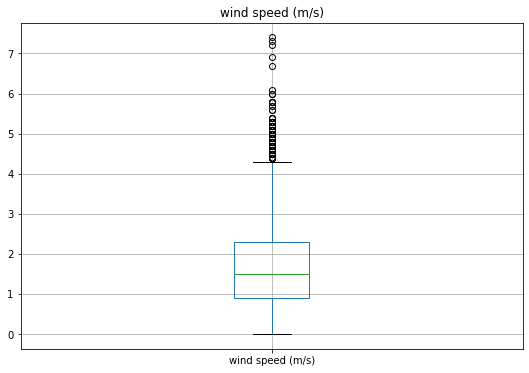

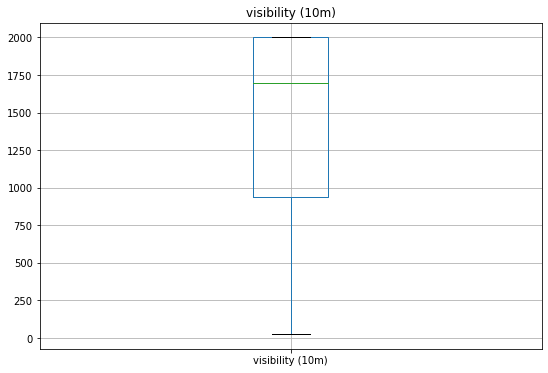

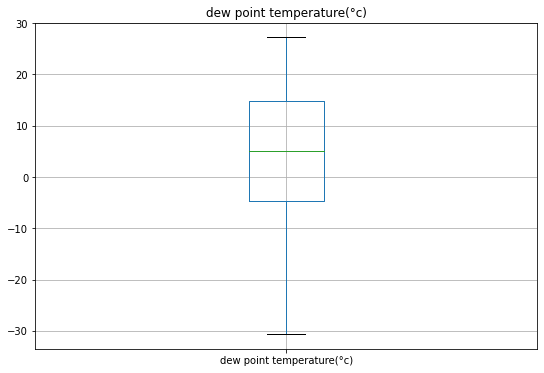

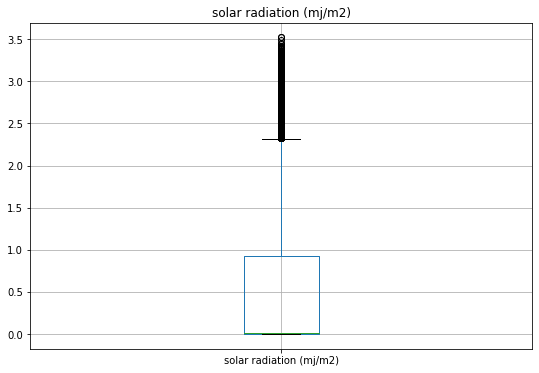

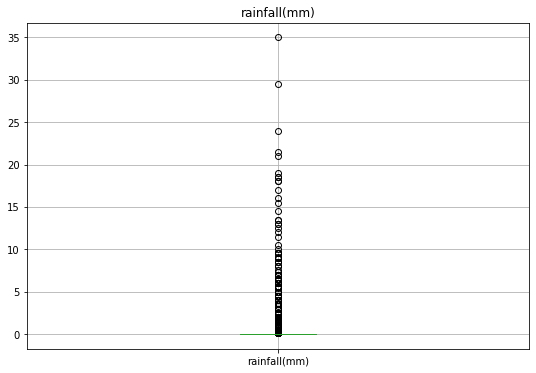

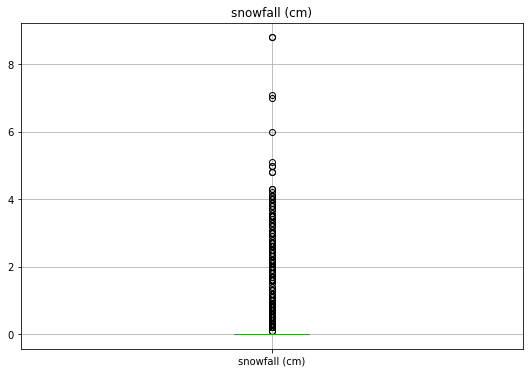

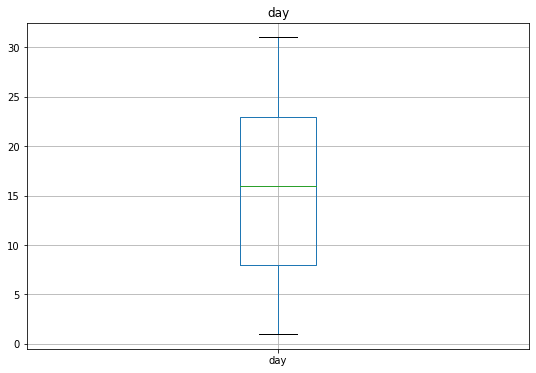

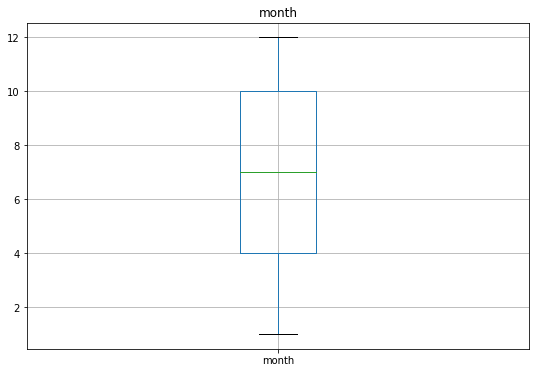

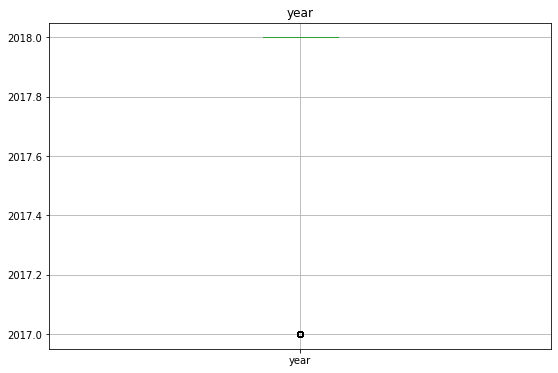

In [28]:
# boxplot for each numerical feature  

for col in num_variables:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_df.boxplot(col, ax= ax)
    ax.set_title(col)
plt.show()

Variables such as wind speed (m/s), solar radiation (mj/m2), rainfall(mm), snowfall (cm) has outliers as seen in the boxplot.

### **Categorical Variables**

In [29]:
cat_variables= ['seasons', 'holiday', 'functioning day']

Look at the different values of distinct categories in our variables.

In [30]:
# Seasons column
print(f"Count of distinct categories in season variable: {bike_df['seasons'].nunique()}")
bike_df["seasons"].unique()

Count of distinct categories in season variable: 4


array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [31]:
# holiday column
print(f"Count of distinct categories in holiday variable: {bike_df['holiday'].nunique()}")
bike_df["holiday"].unique()

Count of distinct categories in holiday variable: 2


array(['No Holiday', 'Holiday'], dtype=object)

In [32]:
# functioning day column
print(f"Count of distinct categories in functioning day variable: {bike_df['functioning day'].nunique()}")
bike_df["functioning day"].unique()

Count of distinct categories in functioning day variable: 2


array(['Yes', 'No'], dtype=object)

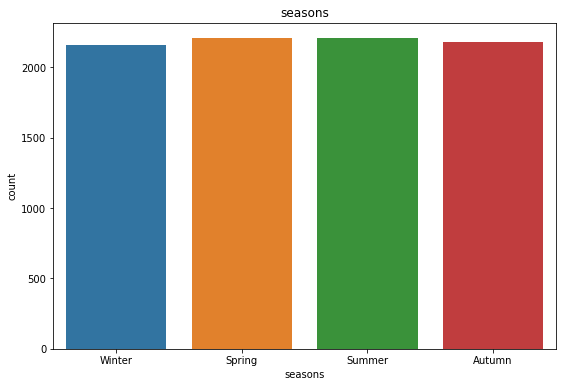

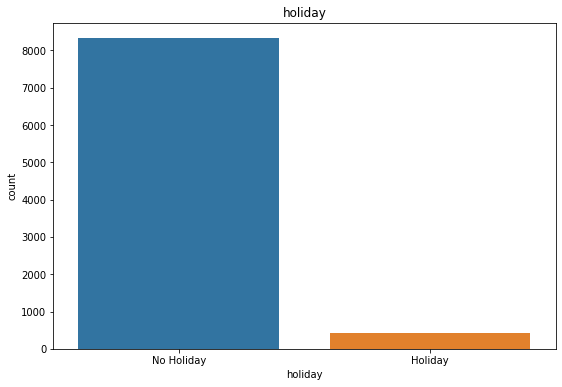

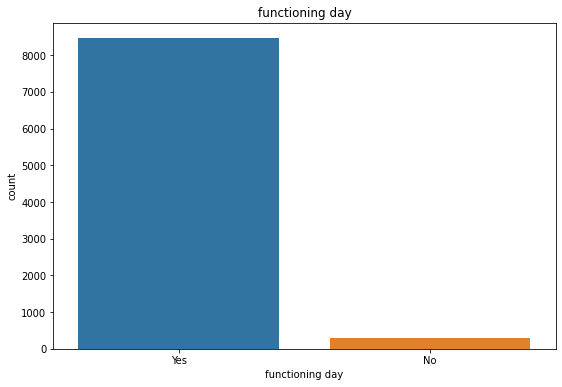

In [33]:
# count plot
for col in cat_variables:
  plt.figure(figsize=(9,6))
  sns.countplot(data = bike_df, x = col)
  plt.title(col);

## **Bivariate Analysis**


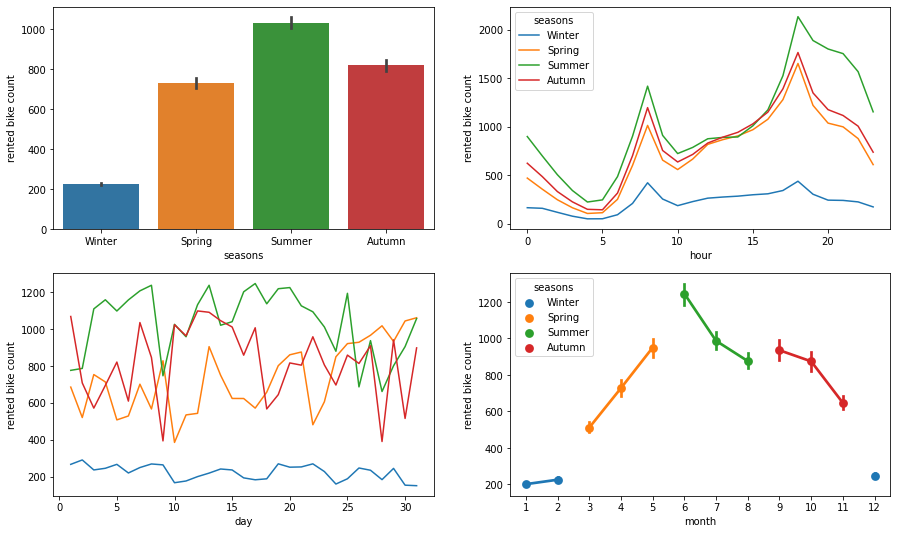

In [34]:
# Analysis of rented bike count on hour, day and monthly basis
fig, ax = plt.subplots(2,2,figsize=(15,9))

sns.barplot(x= 'seasons', y= dependent_var, data= bike_df, ax= ax[0][0])

sns.lineplot(x= 'hour', y= dependent_var, hue= 'seasons',
             ci=None, data= bike_df, ax= ax[0][1])

sns.lineplot(x= 'day', y= dependent_var, hue= 'seasons',
             ci=None, data= bike_df, legend=False, ax= ax[1][0])

sns.pointplot(x= 'month', y= dependent_var, hue= 'seasons',
              data= bike_df, ax= ax[1][1])

plt.show()

The highest number of bike rents occur in summer while the least bike rents occur in winter. On hourly basis, mostly bike rents occur at morning 8:00 and in evening at 17:00. The bike count count rises in afternoon. According to months, highest number of bike rents occur in June and least in January.

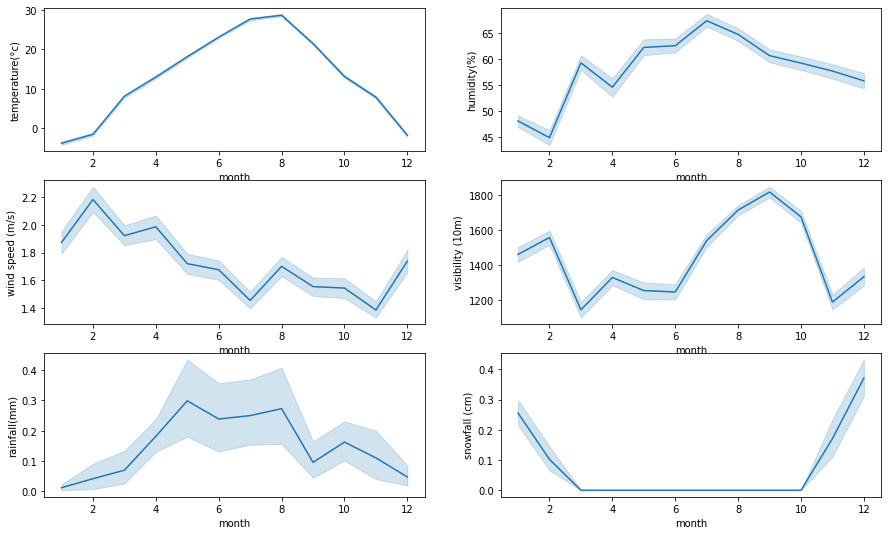

In [35]:
fig, ax = plt.subplots(3,2,figsize=(15,9))

sns.lineplot('month', 'temperature(°c)', data=bike_df, ax=ax[0][0])

sns.lineplot('month', 'humidity(%)', data=bike_df, ax=ax[0][1])

sns.lineplot('month', 'wind speed (m/s)', data=bike_df, ax=ax[1][0])

sns.lineplot('month', 'visibility (10m)', data=bike_df, ax=ax[1][1])

sns.lineplot('month', 'rainfall(mm)', data=bike_df, ax=ax[2][0])

sns.lineplot('month', 'snowfall (cm)', data=bike_df, ax=ax[2][1])

plt.show()

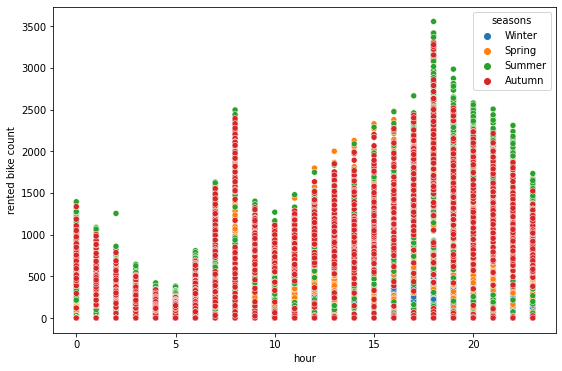

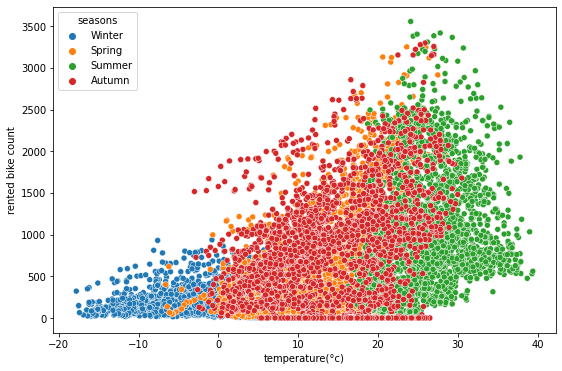

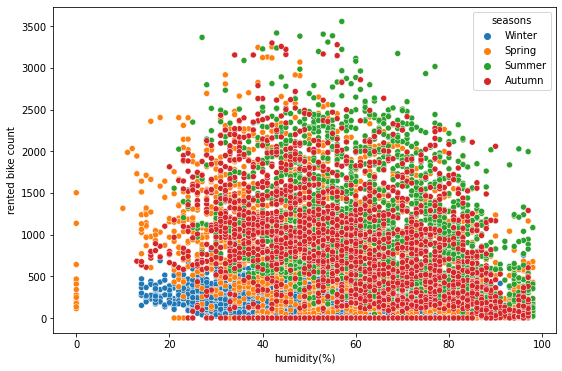

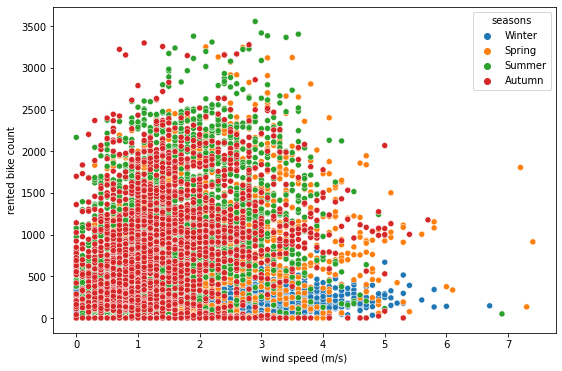

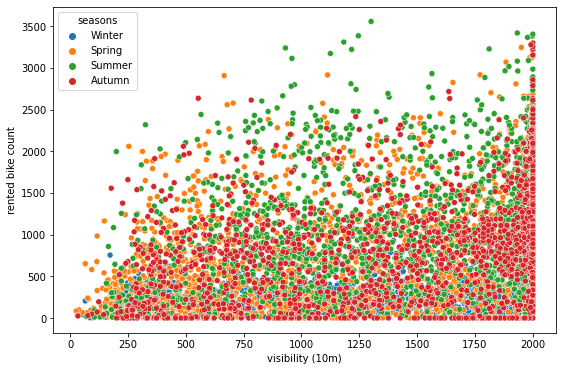

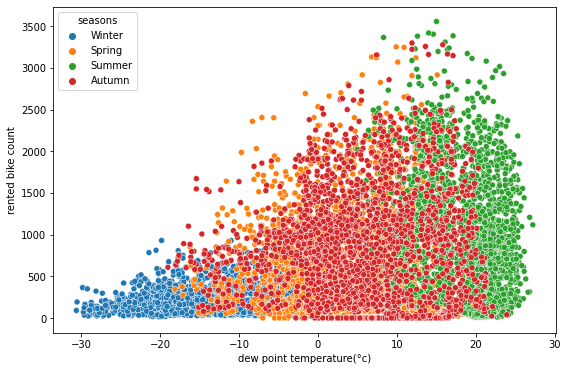

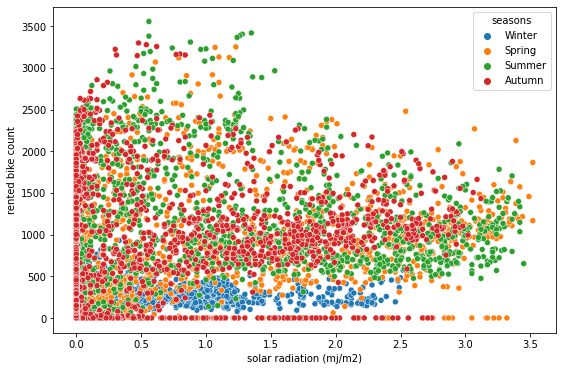

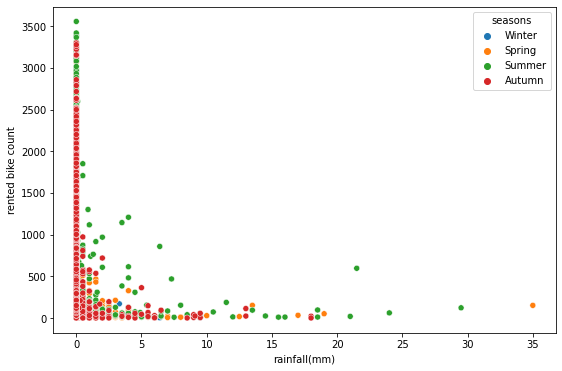

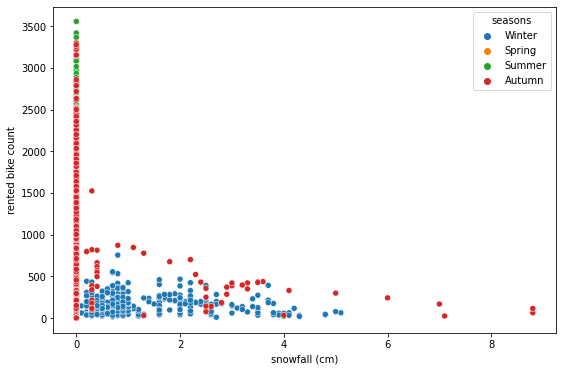

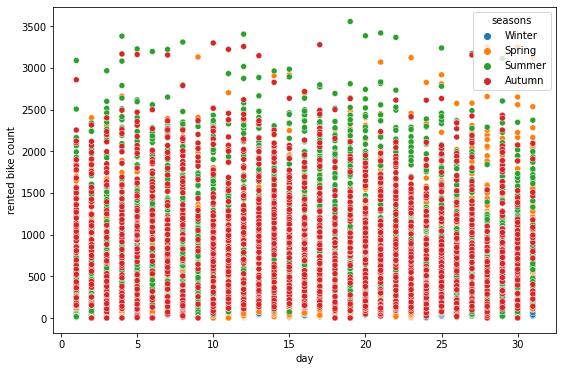

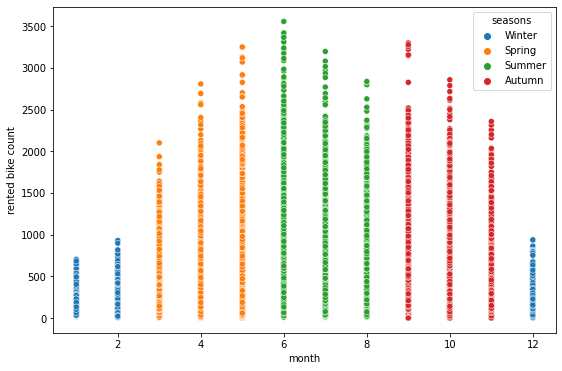

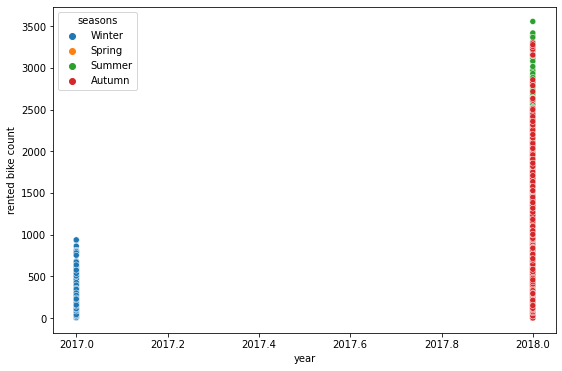

In [36]:
for col in num_variables:

  fig= plt.figure(figsize=(9,6))
  ax= fig.gca()
  sns.scatterplot(col, 'rented bike count', hue='seasons', data= bike_df);

# **Feature Selection**

### **Correlation**

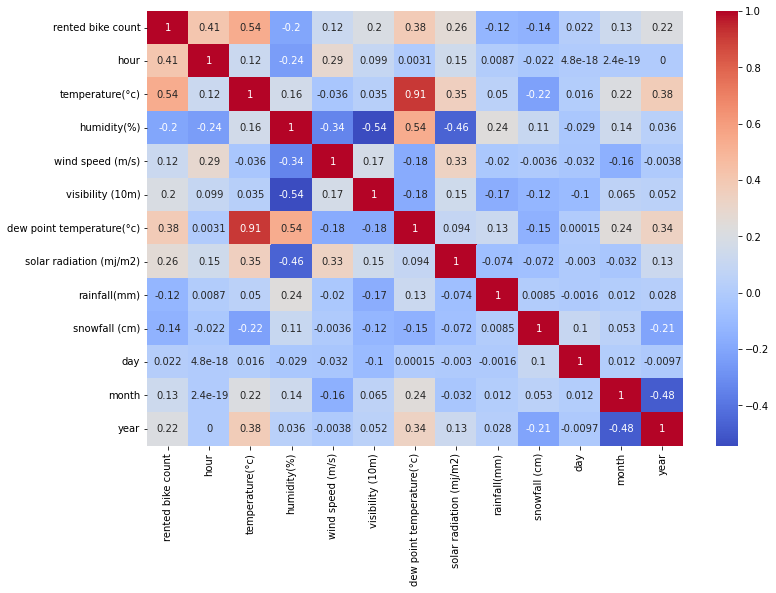

In [37]:
corr_df= bike_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_df, annot=True, cmap= 'coolwarm');

In [38]:
bike_df.head()

,rented bike count,hour,temperature(°c),humidity(%),wind speed (m/s),visibility (10m),dew point temperature(°c),solar radiation (mj/m2),rainfall(mm),snowfall (cm),seasons,holiday,functioning day,day,month,year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017


### **Detecting Multicollinearity using VIF**

In [39]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

* VIF starts at 1 and has no upper limit
* VIF = 1, no correlation between the independent variable and the other variables
* VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In [40]:
calc_vif(bike_df[[i for i in num_variables]])

,variables,VIF
0,hour,4.458880
1,temperature(°c),188.666573
2,humidity(%),187.533688
3,wind speed (m/s),4.890096
4,visibility (10m),10.788995
5,dew point temperature(°c),126.954261
6,solar radiation (mj/m2),2.904971
7,rainfall(mm),1.103386
8,snowfall (cm),1.155412
9,day,4.379818


We can see here that the 'year', 'dew point temperature(°c)', 'temperature(°c)', and 'humidity(%)'  have a high VIF value, meaning they can be predicted by other independent variables in the dataset.

Dropping one of the correlated features will help in bringing down the multicollinearity between correlated features.

In [41]:
# droping 'dew point temperature(°c)', 'year', 'day', 'month'
calc_vif(bike_df[[i for i in num_variables if i not in ['dew point temperature(°c)', 'year', 'day', 'month', 'wind speed (m/s)', 'snowfall (cm)']]])

,variables,VIF
0,hour,3.466405
1,temperature(°c),2.874274
2,humidity(%),4.211866
3,visibility (10m),4.207115
4,solar radiation (mj/m2),1.895969
5,rainfall(mm),1.078001


In [42]:
dataset= bike_df.drop(['dew point temperature(°c)', 'year', 'day', 'month'], axis=1)

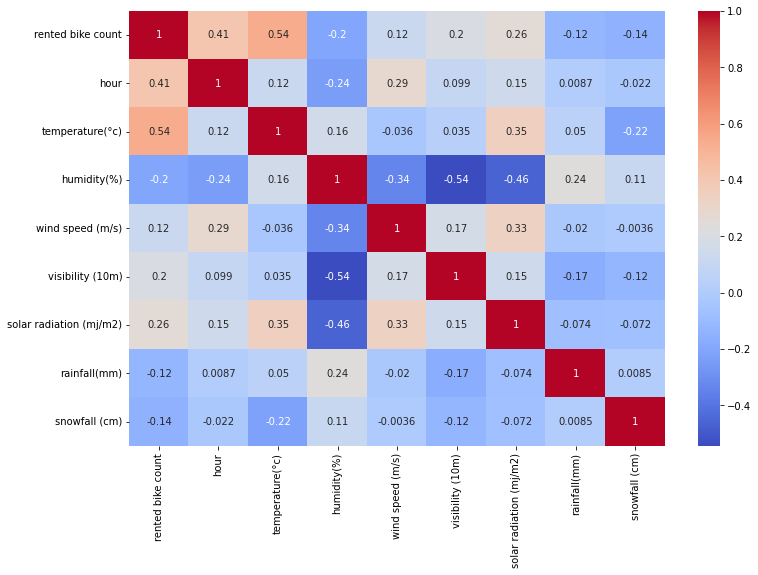

In [43]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), annot=True, cmap= 'coolwarm');

### Data encoding



In [44]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
label_en = LabelEncoder()
dataset[cat_variables] = dataset[cat_variables].apply(label_en.fit_transform)

In [45]:
dataset.head()

,rented bike count,hour,temperature(°c),humidity(%),wind speed (m/s),visibility (10m),solar radiation (mj/m2),rainfall(mm),snowfall (cm),seasons,holiday,functioning day
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,3,1,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,3,1,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,3,1,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,3,1,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,3,1,1


### **Data Preparation**

In [46]:
X= dataset.drop(dependent_var, axis=1)
y= np.sqrt(dataset[dependent_var])

In [47]:
X.head()

,hour,temperature(°c),humidity(%),wind speed (m/s),visibility (10m),solar radiation (mj/m2),rainfall(mm),snowfall (cm),seasons,holiday,functioning day
0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,3,1,1
1,1,-5.5,38,0.8,2000,0.0,0.0,0.0,3,1,1
2,2,-6.0,39,1.0,2000,0.0,0.0,0.0,3,1,1
3,3,-6.2,40,0.9,2000,0.0,0.0,0.0,3,1,1
4,4,-6.0,36,2.3,2000,0.0,0.0,0.0,3,1,1


In [48]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: rented bike count, dtype: float64

In [49]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# # transform data
# X = scaler.fit_transform(X)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [51]:
X_train.shape

(6132, 11)

In [52]:
X_test.shape

(2628, 11)

# **Linear Regression**

In [53]:
# fitting Linear Regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression().fit(X_train, y_train)

In [54]:
lin_reg.score(X_train, y_train)

0.651355683589824

In [55]:
lin_reg.coef_

array([ 4.78652264e-01,  5.56240481e-01, -1.56138914e-01,  5.93000262e-02,
        4.59576719e-04, -9.93647039e-01, -1.52301728e+00,  1.81809489e-01,
       -2.13294439e+00,  3.33973901e+00,  2.86968277e+01])

In [56]:
lin_reg.intercept_

-7.766377735246877

In [57]:
y_pred_tr= lin_reg.predict(X_train)
y_pred= lin_reg.predict(X_test)

### **Evaluation Metrics**

In [59]:
# Evaluation metrics for train data
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print("Evaluation metrics for train data")
MSE  = mean_squared_error(y_train, y_pred_tr)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAE= mean_absolute_error(y_train, y_pred_tr)
print("MAE :",MAE)
print(" ")
r2 = r2_score(y_train, y_pred_tr)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_train, y_pred_tr))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Evaluation metrics for train data
MSE : 54.23249788666868
RMSE : 7.36427171461433
MAE : 5.634530901082256
 
R2 : 0.651355683589824
Adjusted R2 :  0.6498896715559891


In [58]:
# Evaluation metrics for test data
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print("Evaluation metrics for test data")
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAE= mean_absolute_error(y_test, y_pred)
print("MAE :",MAE)
print(" ")
r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Evaluation metrics for test data
MSE : 54.354342221307505
RMSE : 7.372539740232501
MAE : 5.674272451729157
 
R2 : 0.6461261744896516
Adjusted R2 :  0.6446381729297839
